# **Penting!**

1. **Fare :** Harga tiket passenger tersebut
2. **Family Size :** Jumlah anggota keluarga dari passenger tersebut, seperti anak, orang tua, sepupu, saudara, dll., yang ikut ke dalam kapal

# **Data Preprocessing**

## **Import Libraries**

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Import Dataset**

In [2]:
# Membaca dataset
df_tr = pd.read_csv('train_data.csv', sep=",")
df_ts = pd.read_csv('test_data.csv', sep=",")

## **Data Understanding**

In [3]:
# Menampilkan beberapa baris pertama dataset
df_tr.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [4]:
df_ts.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [5]:
df_tr.describe()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,395.500000,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.744949,0.005051,0.040404,0.209596,0.185606,0.092172,0.720960
std,228.774999,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.436165,0.070932,0.197029,0.407277,0.389034,0.289451,0.448811
min,0.000000,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197.750000,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,395.500000,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,593.250000,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,791.000000,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_ts.describe()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00,100.00000,100.000000,100.00000,100.000000,100.000000
mean,840.500000,841.500000,0.360000,0.650000,0.355656,0.048333,0.230000,0.200000,0.57000,0.104000,0.770000,0.01,0.08000,0.140000,0.21000,0.040000,0.740000
std,29.011492,29.011492,0.482418,0.479372,0.161188,0.053429,0.422953,0.402015,0.49757,0.207885,0.422953,0.10,0.27266,0.348735,0.40936,0.196946,0.440844
min,791.000000,792.000000,0.000000,0.000000,0.005250,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.000000,0.000000
25%,815.750000,816.750000,0.000000,0.000000,0.271875,0.015412,0.000000,0.000000,0.00000,0.000000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,0.000000
50%,840.500000,841.500000,0.000000,1.000000,0.350000,0.025374,0.000000,0.000000,1.00000,0.000000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,1.000000
75%,865.250000,866.250000,1.000000,1.000000,0.426563,0.058556,0.000000,0.000000,1.00000,0.100000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,1.000000
max,890.000000,891.000000,1.000000,1.000000,0.925000,0.321798,1.000000,1.000000,1.00000,1.000000,1.000000,1.00,1.00000,1.000000,1.00000,1.000000,1.000000


In [7]:
print(f"Training Dataset :\nRows: {df_tr.shape[0]}, Columns: {df_tr.shape[1]}")
print(f"Testing Dataset :\nRows: {df_ts.shape[0]}, Columns: {df_ts.shape[1]}")

Training Dataset :
Rows: 792, Columns: 17
Testing Dataset :
Rows: 100, Columns: 17


In [8]:
df_tr.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Sex              int64
Age            float64
Fare           float64
Pclass_1         int64
Pclass_2         int64
Pclass_3         int64
Family_size    float64
Title_1          int64
Title_2          int64
Title_3          int64
Title_4          int64
Emb_1            int64
Emb_2            int64
Emb_3            int64
dtype: object

In [9]:
df_ts.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Sex              int64
Age            float64
Fare           float64
Pclass_1         int64
Pclass_2         int64
Pclass_3         int64
Family_size    float64
Title_1          int64
Title_2          int64
Title_3          int64
Title_4          int64
Emb_1            int64
Emb_2            int64
Emb_3            int64
dtype: object

In [10]:
df_tr.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [11]:
df_ts.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

## **Drop Irrelevant Features**

In [12]:
df_tr = df_tr.drop(["Unnamed: 0","PassengerId"], axis=1)
df_ts = df_ts.drop(["Unnamed: 0","PassengerId"], axis=1)

In [13]:
print(f"Training Dataset :\nRows: {df_tr.shape[0]}, Columns: {df_tr.shape[1]}")
print(f"Testing Dataset :\nRows: {df_ts.shape[0]}, Columns: {df_ts.shape[1]}")

Training Dataset :
Rows: 792, Columns: 15
Testing Dataset :
Rows: 100, Columns: 15


In [14]:
df_tr.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [15]:
df_ts.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


## **Drop Outliers**

In [16]:
out_features = ['Sex','Age','Family_size','Fare']

In [17]:
for i in out_features:

    Q1 = df_tr[i].quantile(0.25)
    Q3 = df_tr[i].quantile(0.75)

    IQR = Q3 - Q1

    # Maximum value of each numerical columns
    maximum = Q3 + (1.5 * IQR)
    minimum = Q3 - (1.5 * IQR)

    count_max = df_tr[df_tr[i] > maximum][i].count()
    count_min = df_tr[df_tr[i] < minimum][i].count()
    print(f"Count of Outliers above the Maximum Values of '{i}' column ({maximum}) : {count_max}\n")
    print(f"Count of Outliers above the Minimum Values of '{i}' column ({minimum}) : {count_min}\n")

    # Drop the rows that contain outliers
    df_tr = df_tr.drop(df_tr[df_tr[i] > maximum].index)
    df_tr = df_tr.drop(df_tr[df_tr[i] < minimum].index)

df_tr.shape

Count of Outliers above the Maximum Values of 'Sex' column (2.5) : 0

Count of Outliers above the Minimum Values of 'Sex' column (-0.5) : 0

Count of Outliers above the Maximum Values of 'Age' column (0.6812499999999999) : 39

Count of Outliers above the Minimum Values of 'Age' column (0.19375000000000003) : 71

Count of Outliers above the Maximum Values of 'Family_size' column (0.25) : 44

Count of Outliers above the Minimum Values of 'Family_size' column (-0.05000000000000002) : 0

Count of Outliers above the Maximum Values of 'Fare' column (0.10643800899890146) : 101

Count of Outliers above the Minimum Values of 'Fare' column (-0.0027937115432812576) : 0



(537, 15)

In [18]:
for i in out_features:

    Q1 = df_ts[i].quantile(0.25)
    Q3 = df_ts[i].quantile(0.75)

    IQR = Q3 - Q1

    # Maximum value of each numerical columns
    maximum = Q3 + (1.5 * IQR)
    minimum = Q3 - (1.5 * IQR)

    count_max = df_ts[df_ts[i] > maximum][i].count()
    count_min = df_ts[df_ts[i] < minimum][i].count()
    print(f"Count of Outliers above the Maximum Values of '{i}' column ({maximum}) : {count_max}\n")
    print(f"Count of Outliers above the Minimum Values of '{i}' column ({minimum}) : {count_min}\n")

    # Drop the rows that contain outliers
    df_ts = df_ts.drop(df_ts[df_ts[i] > maximum].index)
    df_ts = df_ts.drop(df_ts[df_ts[i] < minimum].index)

df_ts.shape

Count of Outliers above the Maximum Values of 'Sex' column (2.5) : 0

Count of Outliers above the Minimum Values of 'Sex' column (-0.5) : 0

Count of Outliers above the Maximum Values of 'Age' column (0.65859375) : 3

Count of Outliers above the Minimum Values of 'Age' column (0.19453125000000004) : 12

Count of Outliers above the Maximum Values of 'Family_size' column (0.25) : 6

Count of Outliers above the Minimum Values of 'Family_size' column (-0.05000000000000002) : 0

Count of Outliers above the Maximum Values of 'Fare' column (0.10375418773710346) : 6

Count of Outliers above the Minimum Values of 'Fare' column (-0.002256947290921657) : 0



(73, 15)

## **Feature Correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

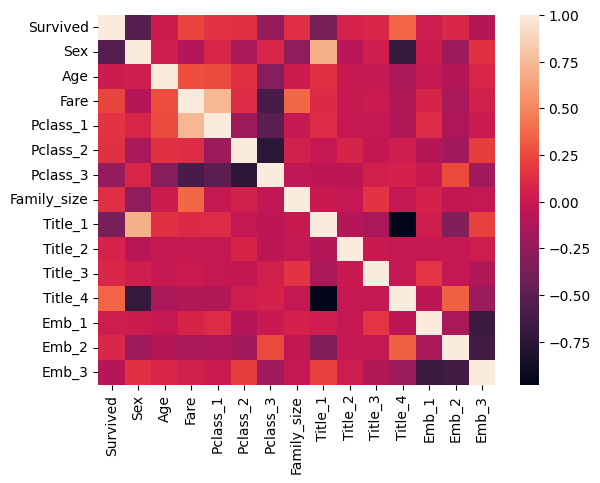

In [19]:
corr = df_tr.corr()
# sns.heatmap(corr, annot=True, fmt='.2g')  # Show Correlation Coefficients Numbers
sns.heatmap(corr, fmt='.2g')
plt.show

In [20]:
print(corr['Survived'])

Survived       1.000000
Sex           -0.539378
Age            0.017567
Fare           0.226932
Pclass_1       0.157175
Pclass_2       0.147634
Pclass_3      -0.237191
Family_size    0.141493
Title_1       -0.369247
Title_2        0.065427
Title_3        0.092615
Title_4        0.351241
Emb_1          0.024882
Emb_2          0.099141
Emb_3         -0.093435
Name: Survived, dtype: float64


## **Data Transformation**

In [21]:
# Memilih fitur yang akan digunakan untuk prediksi
features = ['Sex', 'Age', 'Fare', 'Family_size']

In [22]:
# Memisahkan fitur dan target
X = df_tr[features]
y = df_tr['Survived']

### **Normalization on Training Dataset**

In [23]:
scalers = StandardScaler()

X_scaled = pd.DataFrame(scalers.fit_transform(X), columns=X.columns)
X_scaled

,Sex,Age,Fare,Family_size
0,0.613941,-0.906753,-0.674375,1.012997
1,-1.628822,-0.422430,-0.611535,-0.536802
2,-1.628822,0.667297,3.594108,1.012997
3,0.613941,0.667297,-0.599898,-0.536802
4,0.613941,-0.180268,-0.561886,-0.536802
...,...,...,...,...
532,0.613941,-0.543510,-0.692994,-0.536802
533,0.613941,-0.543510,-0.674375,-0.536802
534,-1.628822,-1.391075,-0.651492,-0.536802
535,0.613941,-0.180268,-0.627827,-0.536802


### **Data Splitting**

In [24]:
# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [25]:
# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Model Predict & Evaluation**

In [26]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Menilai kinerja model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8055555555555556
Confusion Matrix:
[[66 14]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.60      0.75      0.67        28

    accuracy                           0.81       108
   macro avg       0.75      0.79      0.76       108
weighted avg       0.83      0.81      0.81       108



# **Deploy Model**

In [27]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scalers, open('scaler.pkl', 'wb'))